In [48]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

evaluation_report_dir = 'evaluation_reports/'

# All Model Summary Analysis

## COT Disabled Summary

In [49]:
cot_disabled_summary_json = json.load(open(evaluation_report_dir + 'CoT__disabled__summary.json'))

In [50]:
cot_disabled_metrics = {}
cot_disabled_metrics['overall_metrics'] = cot_disabled_summary_json['overall_metrics']
cot_disabled_metrics['claude_generated_data_metrics'] = cot_disabled_summary_json['claude_generated_data_metrics']
cot_disabled_metrics['gemini_generated_data_metrics'] = cot_disabled_summary_json['gemini_generated_data_metrics']

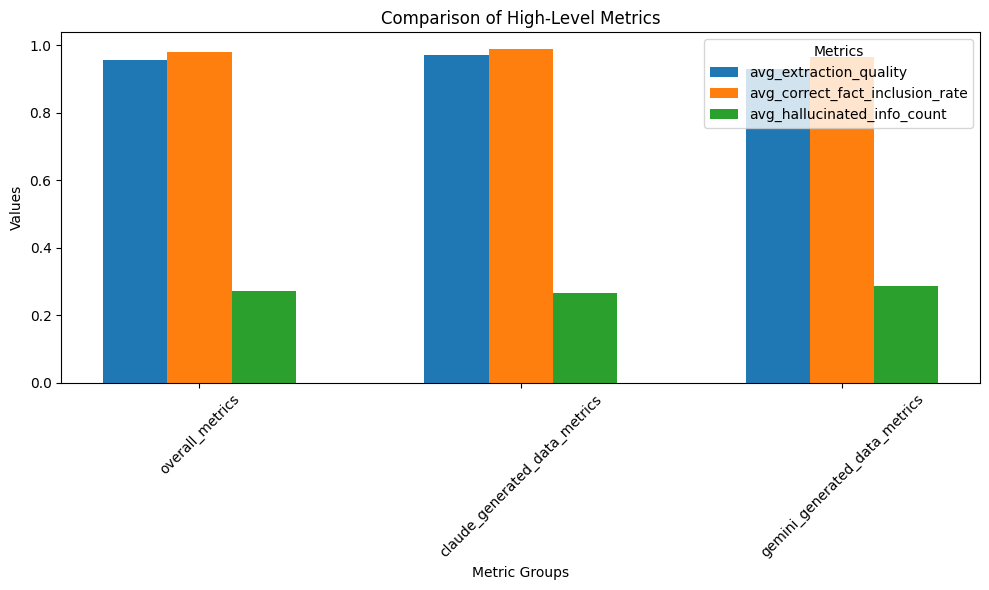

In [51]:


# Extracting high-level metrics to compare
categories = ["avg_extraction_quality", "avg_correct_fact_inclusion_rate", "avg_hallucinated_info_count"]
group_names = list(cot_disabled_metrics.keys())
data = {cat: [cot_disabled_metrics[group][cat] for group in group_names] for cat in categories}

# Plotting
x = np.arange(len(group_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each metric
for i, cat in enumerate(categories):
    ax.bar(x + i * width, data[cat], width, label=cat)

# Formatting the plot
ax.set_xlabel('Metric Groups')
ax.set_ylabel('Values')
ax.set_title('Comparison of High-Level Metrics')
ax.set_xticks(x + width, group_names)
ax.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

### Per scenario analysis

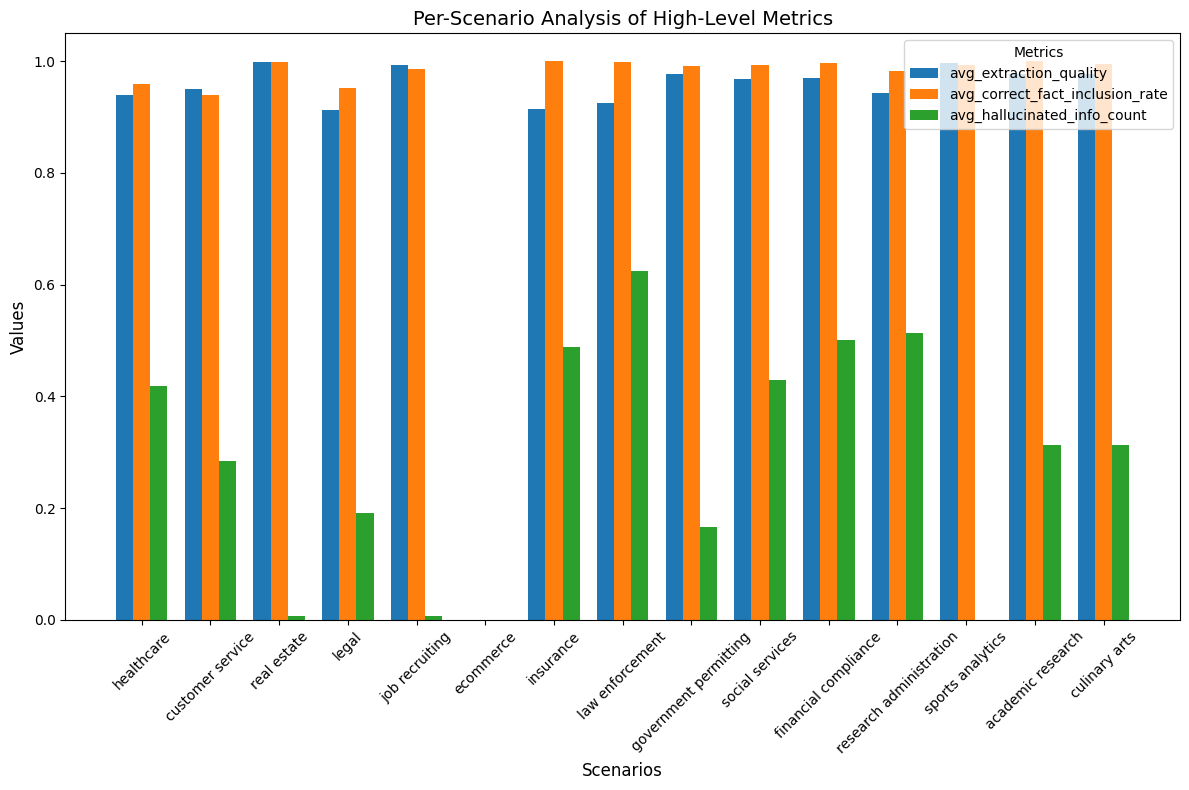

In [52]:
scenario_metrics = cot_disabled_summary_json['scenario_metrics']

# Create a DataFrame for easier manipulation
df = pd.DataFrame(scenario_metrics)

# Define metrics to analyze
metrics_to_plot = [
    "avg_extraction_quality",
    "avg_correct_fact_inclusion_rate",
    "avg_hallucinated_info_count"
]

# Plot each metric across scenarios
fig, ax = plt.subplots(figsize=(12, 8))
x = range(len(df))  # Scenario positions on x-axis
width = 0.25  # Width of each bar

for i, metric in enumerate(metrics_to_plot):
    ax.bar(
        [pos + i * width for pos in x], 
        df[metric], 
        width, 
        label=metric
    )

# Formatting the plot
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df["scenario_domain"], rotation=45)
ax.set_xlabel('Scenarios', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Per-Scenario Analysis of High-Level Metrics', fontsize=14)
ax.legend(title="Metrics")
plt.tight_layout()

# Display the chart
plt.show()

## COT Enabled Summary

In [53]:
cot_enabled_summary_json = json.load(open(evaluation_report_dir + 'CoT__enabled__summary.json'))

In [54]:
cot_enabled_metrics = {}
cot_enabled_metrics['overall_metrics'] = cot_enabled_summary_json['overall_metrics']
cot_enabled_metrics['claude_generated_data_metrics'] = cot_enabled_summary_json['claude_generated_data_metrics']
cot_enabled_metrics['gemini_generated_data_metrics'] = cot_enabled_summary_json['gemini_generated_data_metrics']


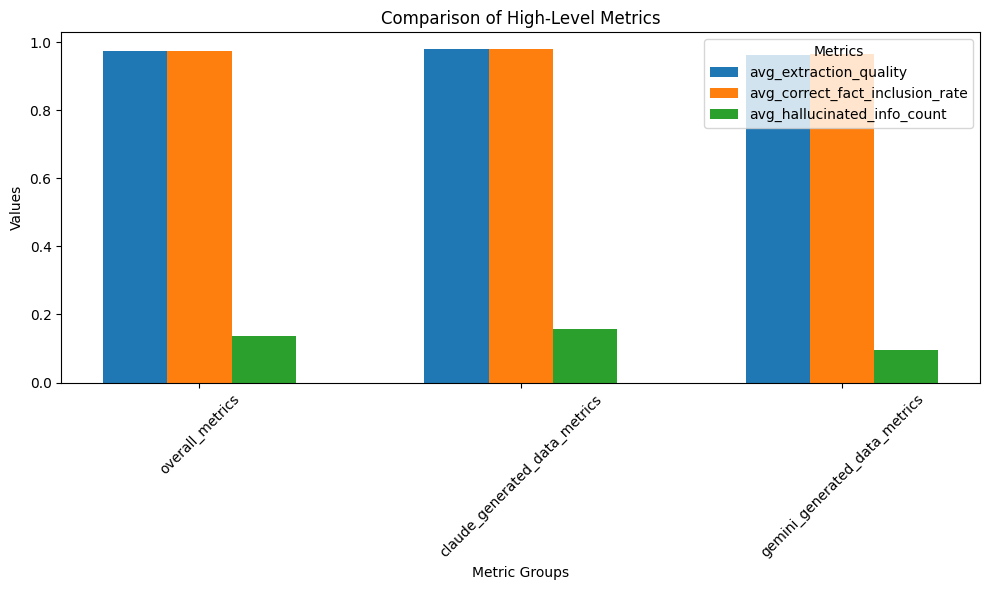

In [55]:
# Extracting high-level metrics to compare
categories = ["avg_extraction_quality", "avg_correct_fact_inclusion_rate", "avg_hallucinated_info_count"]
group_names = list(cot_enabled_metrics.keys())
data = {cat: [cot_enabled_metrics[group][cat] for group in group_names] for cat in categories}

# Plotting
x = np.arange(len(group_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each metric
for i, cat in enumerate(categories):
    ax.bar(x + i * width, data[cat], width, label=cat)

# Formatting the plot
ax.set_xlabel('Metric Groups')
ax.set_ylabel('Values')
ax.set_title('Comparison of High-Level Metrics')
ax.set_xticks(x + width, group_names)
ax.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


### Per scenario analysis

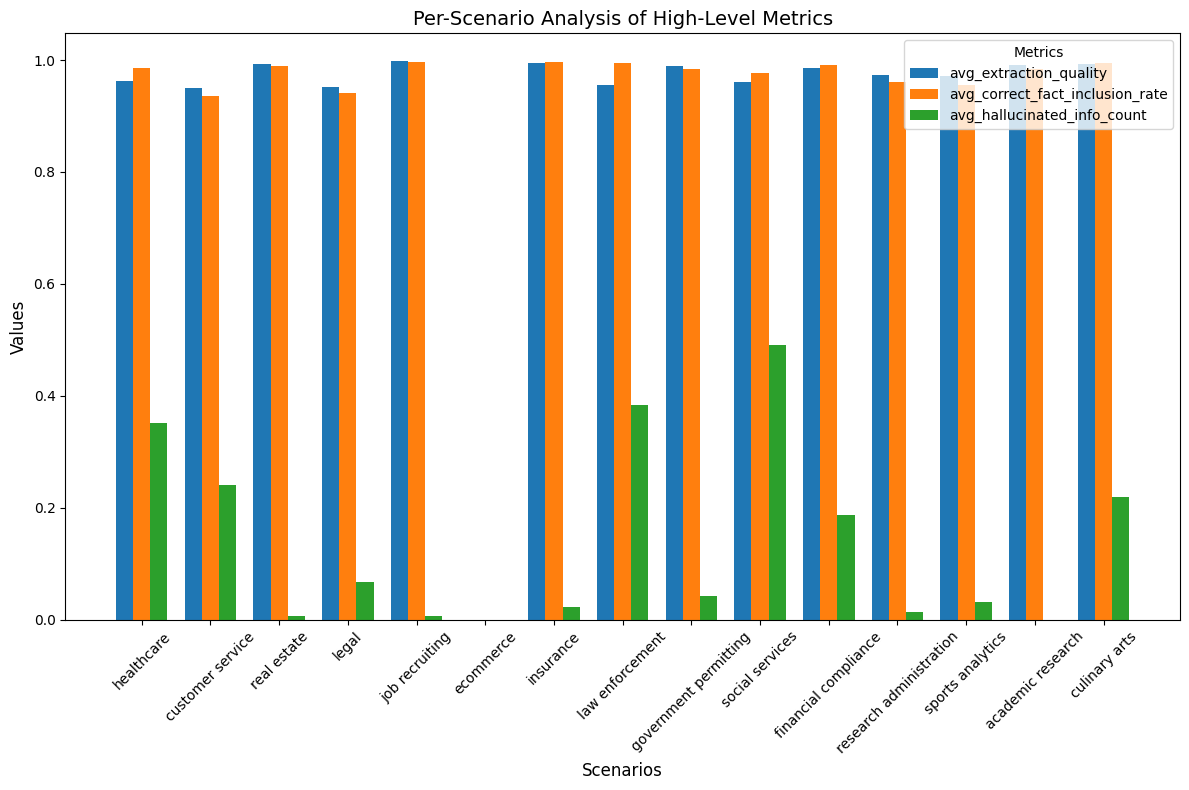

In [56]:
scenario_metrics = cot_enabled_summary_json['scenario_metrics']

# Create a DataFrame for easier manipulation
df = pd.DataFrame(scenario_metrics)

# Define metrics to analyze
metrics_to_plot = [
    "avg_extraction_quality",
    "avg_correct_fact_inclusion_rate",
    "avg_hallucinated_info_count"
]

# Plot each metric across scenarios
fig, ax = plt.subplots(figsize=(12, 8))
x = range(len(df))  # Scenario positions on x-axis
width = 0.25  # Width of each bar

for i, metric in enumerate(metrics_to_plot):
    ax.bar(
        [pos + i * width for pos in x], 
        df[metric], 
        width, 
        label=metric
    )

# Formatting the plot
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df["scenario_domain"], rotation=45)
ax.set_xlabel('Scenarios', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Per-Scenario Analysis of High-Level Metrics', fontsize=14)
ax.legend(title="Metrics")
plt.tight_layout()

# Display the chart
plt.show()

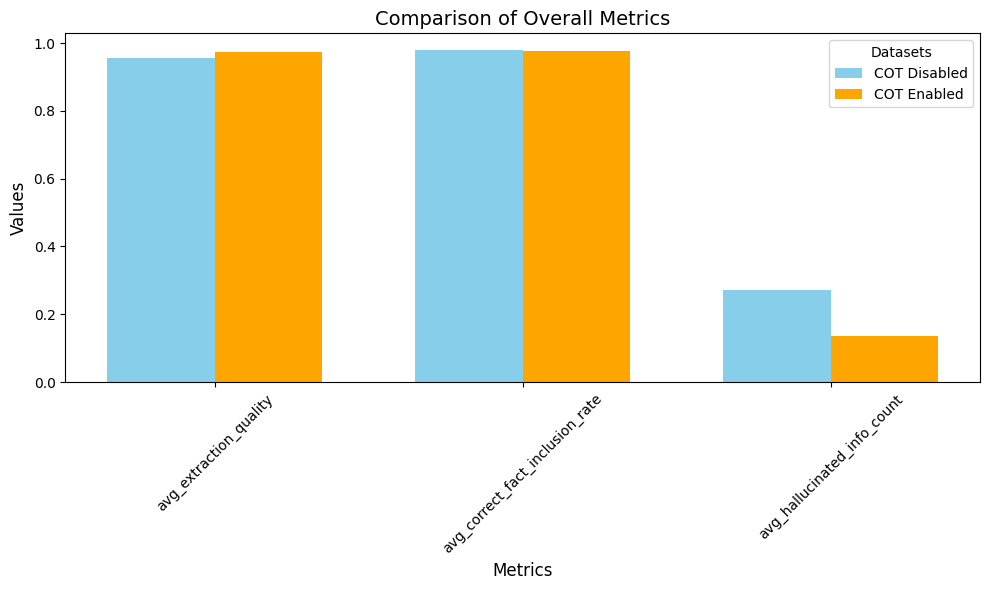

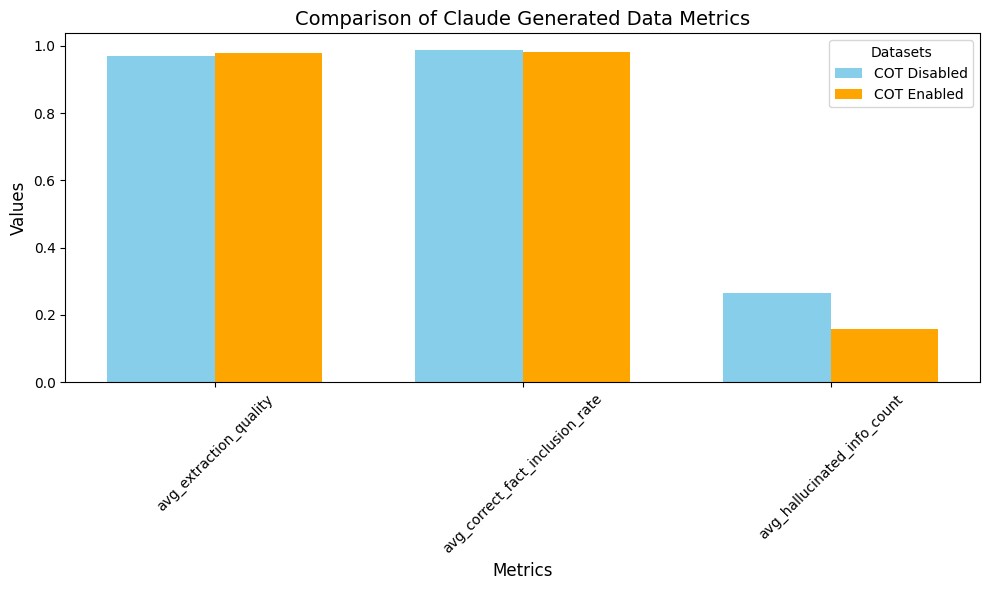

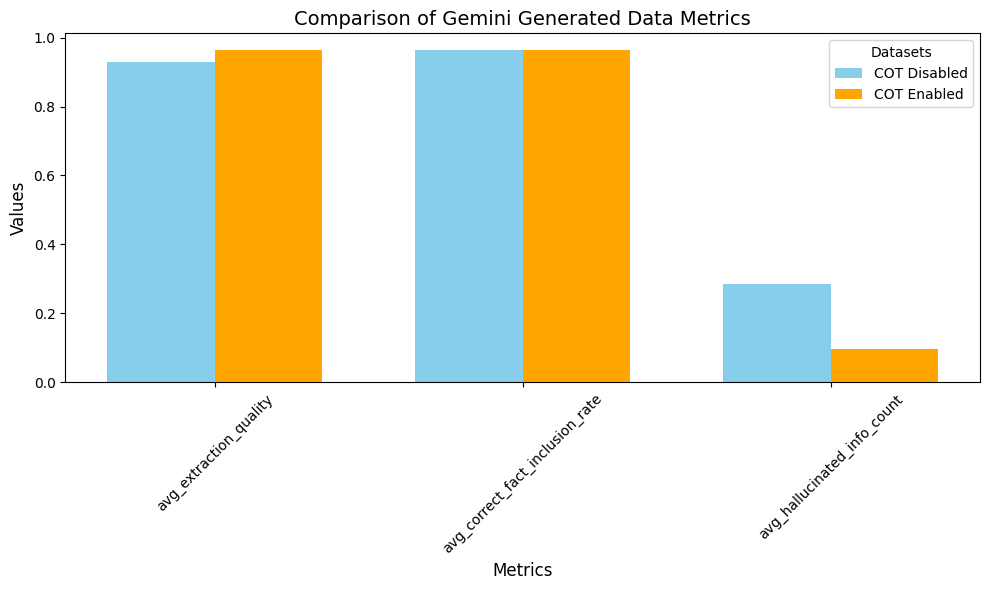

In [57]:
# Define categories for comparison
categories = [
    "overall_metrics",
    "claude_generated_data_metrics",
    "gemini_generated_data_metrics"
]

# Define high-level metrics to compare
metrics_to_compare = [
    "avg_extraction_quality",
    "avg_correct_fact_inclusion_rate",
    "avg_hallucinated_info_count"
]

# Loop through each category
for category in categories:
    # Extract metrics to compare
    values1 = [cot_disabled_metrics[category][metric] for metric in metrics_to_compare]
    values2 = [cot_enabled_metrics[category][metric] for metric in metrics_to_compare]

    # Plotting
    x = range(len(metrics_to_compare))  # Metric positions on x-axis
    width = 0.35  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, values1, width, label='COT Disabled', color='skyblue')
    ax.bar([pos + width for pos in x], values2, width, label='COT Enabled', color='orange')

    # Formatting the plot
    ax.set_xticks([pos + width / 2 for pos in x])
    ax.set_xticklabels(metrics_to_compare, rotation=45)
    ax.set_xlabel('Metrics', fontsize=12)
    ax.set_ylabel('Values', fontsize=12)
    ax.set_title(f'Comparison of {category.replace("_", " ").title()}', fontsize=14)
    ax.legend(title="Datasets")
    plt.tight_layout()

    # Show the plot for each category
    plt.show()

### Trends across scenarios and CoT configurations

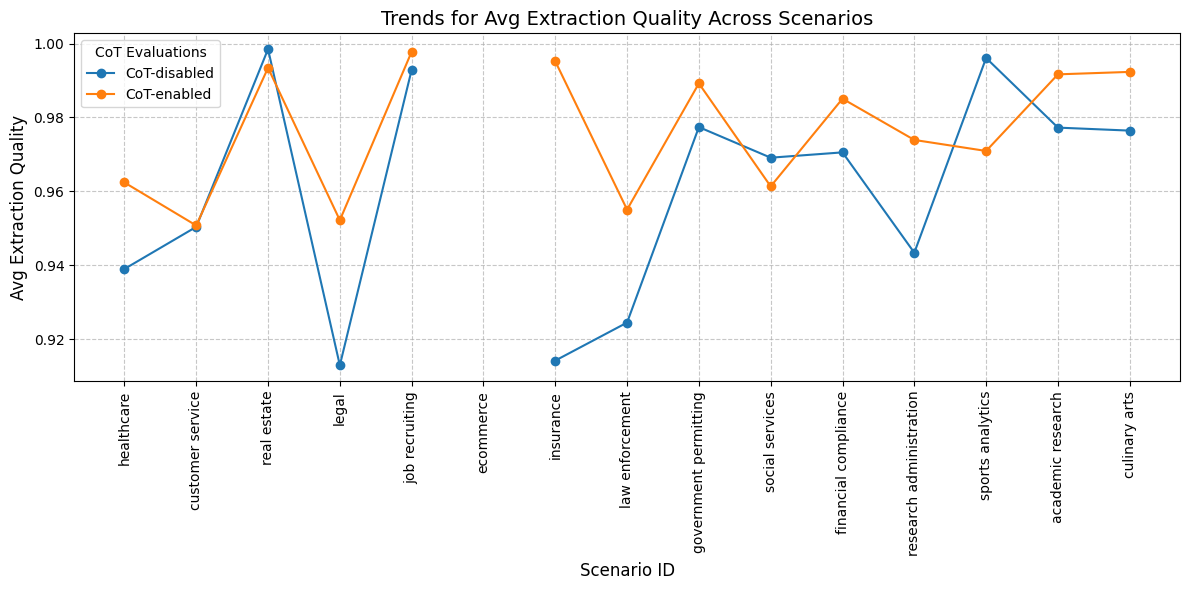

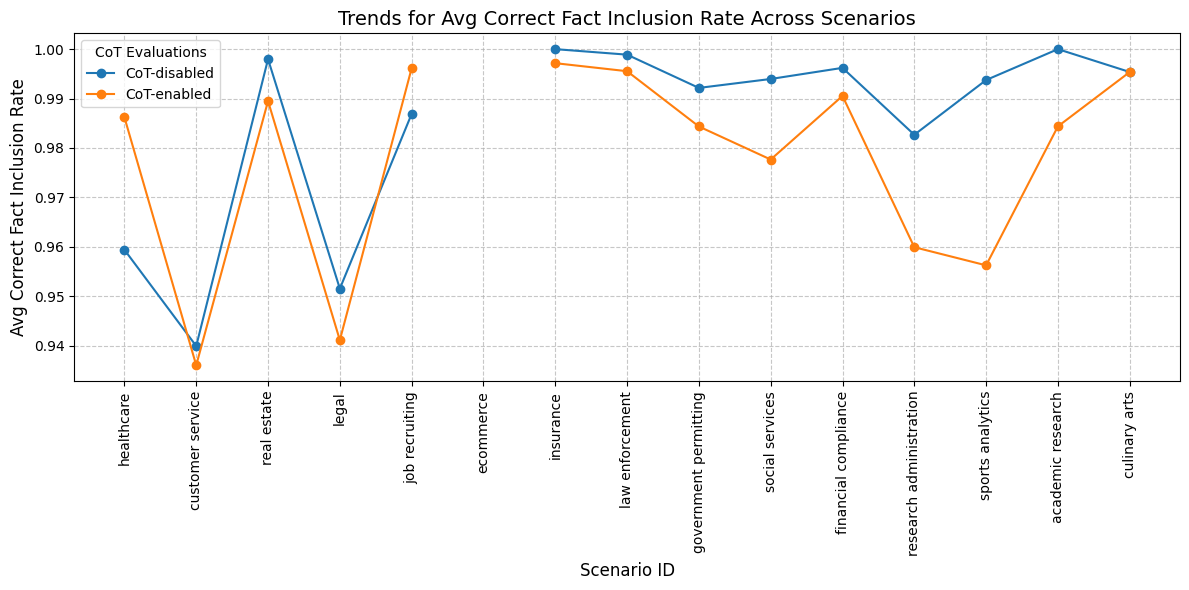

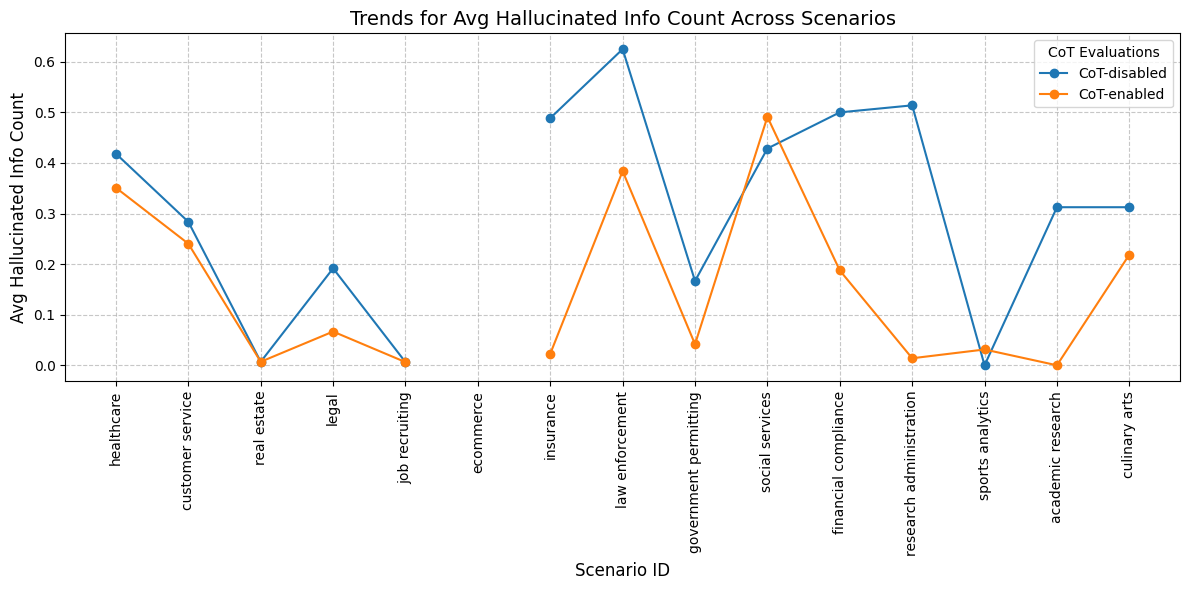

In [66]:
scenario_metrics = {"CoT-disabled": cot_disabled_summary_json['scenario_metrics'],
                    "CoT-enabled": cot_enabled_summary_json['scenario_metrics']}

# List of metrics to compare
metrics_to_compare = ["avg_extraction_quality", "avg_correct_fact_inclusion_rate","avg_hallucinated_info_count"]
CoT_evaluations = ["CoT-disabled","CoT-enabled"]

# Generate plots for each metric
for metric in metrics_to_compare:
    # Prepare data for the current metric
    scenario_dom = [entry["scenario_domain"] for entry in scenario_metrics["CoT-disabled"]]
    data = {
        shot: [entry[metric] for entry in scenario_metrics[shot]]
        for shot in CoT_evaluations
    }

    # Convert data to DataFrame for plotting
    df = pd.DataFrame(data, index=scenario_dom)

    # Plot the current metric
    plt.figure(figsize=(12, 6))
    for shot in CoT_evaluations:
        plt.plot(df.index, df[shot], marker='o', label=shot)

    # Formatting
    plt.title(f"Trends for {metric.replace('_', ' ').title()} Across Scenarios", fontsize=14)
    plt.xlabel("Scenario ID", fontsize=12)
    plt.ylabel(metric.replace('_', ' ').title(), fontsize=12)
    plt.xticks(df.index, [f"{i}" for i in df.index], rotation=90)
    plt.legend(title="CoT Evaluations")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

## 0 vs 5 vs 10 vs 50 Shot Summary Evaluations

In [58]:
zero_shot_summary_json = json.load(open(evaluation_report_dir + 'Fewshot__0__summary.json'))
five_shot_summary_json = json.load(open(evaluation_report_dir + 'Fewshot__5__summary.json'))
ten_shot_summary_json = json.load(open(evaluation_report_dir + 'Fewshot__10__summary.json'))
fifty_shot_summary_json = json.load(open(evaluation_report_dir + 'Fewshot__50__summary.json'))

zero_shot_metrics = {}
zero_shot_metrics['overall_metrics'] = zero_shot_summary_json['overall_metrics']
zero_shot_metrics['claude_generated_data_metrics'] = zero_shot_summary_json['claude_generated_data_metrics']
zero_shot_metrics['gemini_generated_data_metrics'] = zero_shot_summary_json['gemini_generated_data_metrics']

five_shot_metrics = {}
five_shot_metrics['overall_metrics'] = five_shot_summary_json['overall_metrics']
five_shot_metrics['claude_generated_data_metrics'] = five_shot_summary_json['claude_generated_data_metrics']
five_shot_metrics['gemini_generated_data_metrics'] = five_shot_summary_json['gemini_generated_data_metrics']

ten_shot_metrics = {}
ten_shot_metrics['overall_metrics'] = ten_shot_summary_json['overall_metrics']
ten_shot_metrics['claude_generated_data_metrics'] = ten_shot_summary_json['claude_generated_data_metrics']
ten_shot_metrics['gemini_generated_data_metrics'] = ten_shot_summary_json['gemini_generated_data_metrics']

fifty_shot_metrics = {}
fifty_shot_metrics['overall_metrics'] = fifty_shot_summary_json['overall_metrics']
fifty_shot_metrics['claude_generated_data_metrics'] = fifty_shot_summary_json['claude_generated_data_metrics']
fifty_shot_metrics['gemini_generated_data_metrics'] = fifty_shot_summary_json['gemini_generated_data_metrics']


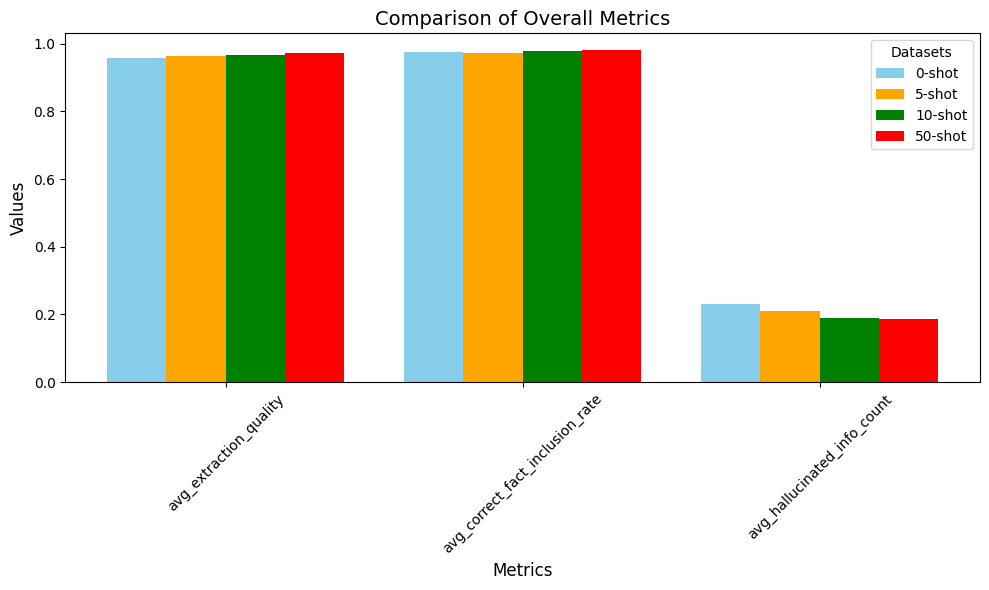

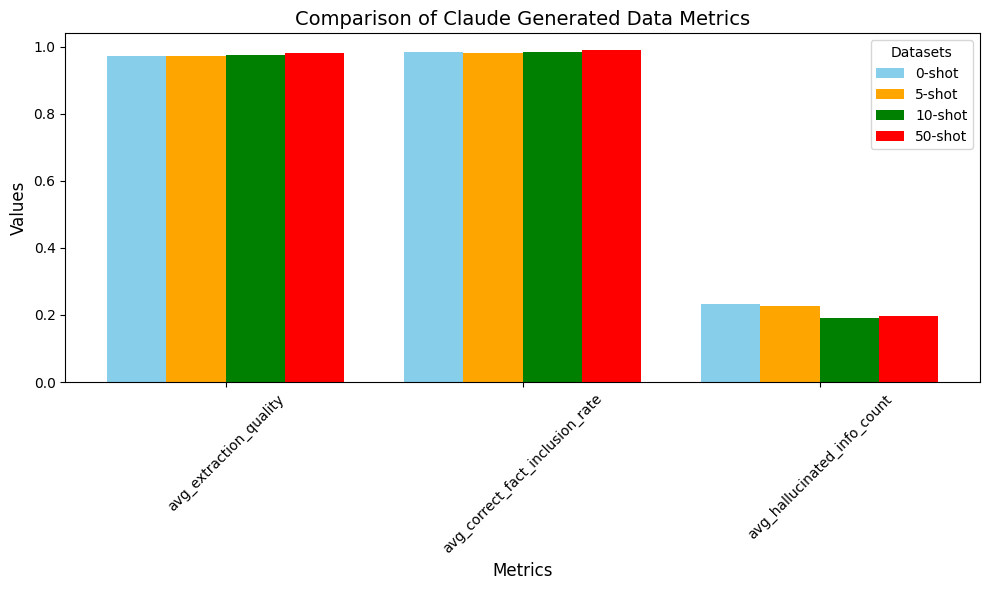

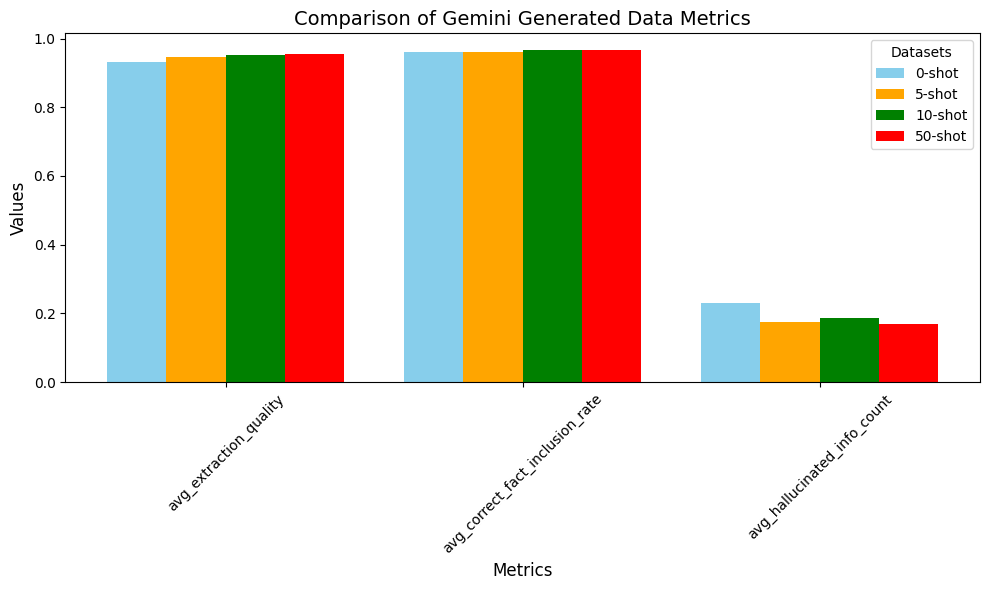

In [59]:
# Define categories for comparison
categories = [
    "overall_metrics",
    "claude_generated_data_metrics",
    "gemini_generated_data_metrics"
]

# Define high-level metrics to compare
metrics_to_compare = [
    "avg_extraction_quality",
    "avg_correct_fact_inclusion_rate",
    "avg_hallucinated_info_count"
]

# Loop through each category
for category in categories:
    # Extract metrics to compare
    values1 = [zero_shot_metrics[category][metric] for metric in metrics_to_compare]
    values2 = [five_shot_metrics[category][metric] for metric in metrics_to_compare]
    values3 = [ten_shot_metrics[category][metric] for metric in metrics_to_compare]
    values4 = [fifty_shot_metrics[category][metric] for metric in metrics_to_compare]

    # Plotting
    x = range(len(metrics_to_compare))  # Metric positions on x-axis
    width = 0.2  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, values1, width, label='0-shot', color='skyblue')
    ax.bar([pos + width for pos in x], values2, width, label='5-shot', color='orange')
    ax.bar([pos + 2 * width for pos in x], values3, width, label='10-shot', color='green')
    ax.bar([pos + 3 * width for pos in x], values4, width, label='50-shot', color='red')

    # Formatting the plot
    ax.set_xticks([pos + 1.5 * width for pos in x])
    ax.set_xticklabels(metrics_to_compare, rotation=45)
    ax.set_xlabel('Metrics', fontsize=12)
    ax.set_ylabel('Values', fontsize=12)
    ax.set_title(f'Comparison of {category.replace("_", " ").title()}', fontsize=14)
    ax.legend(title="Datasets")
    plt.tight_layout()

    # Show the plot for each category
    plt.show()

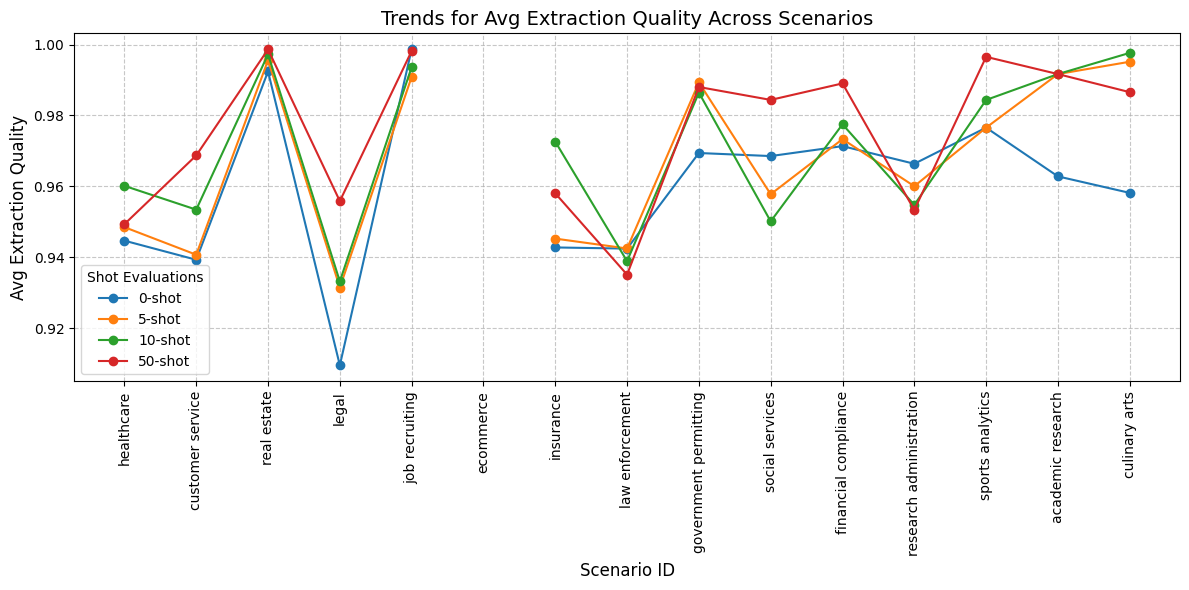

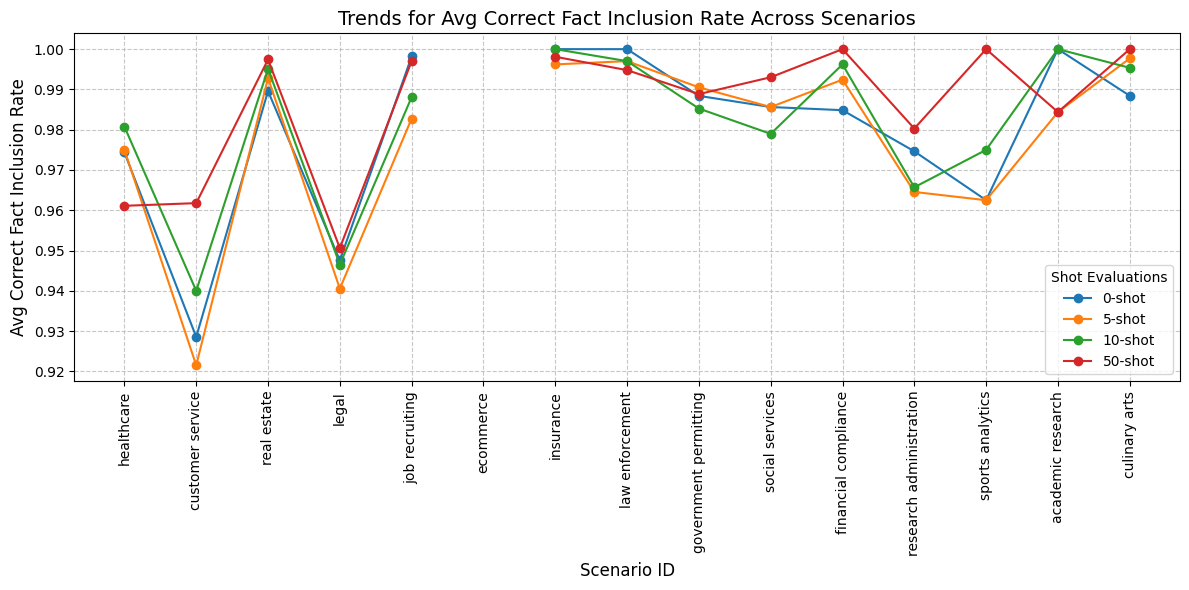

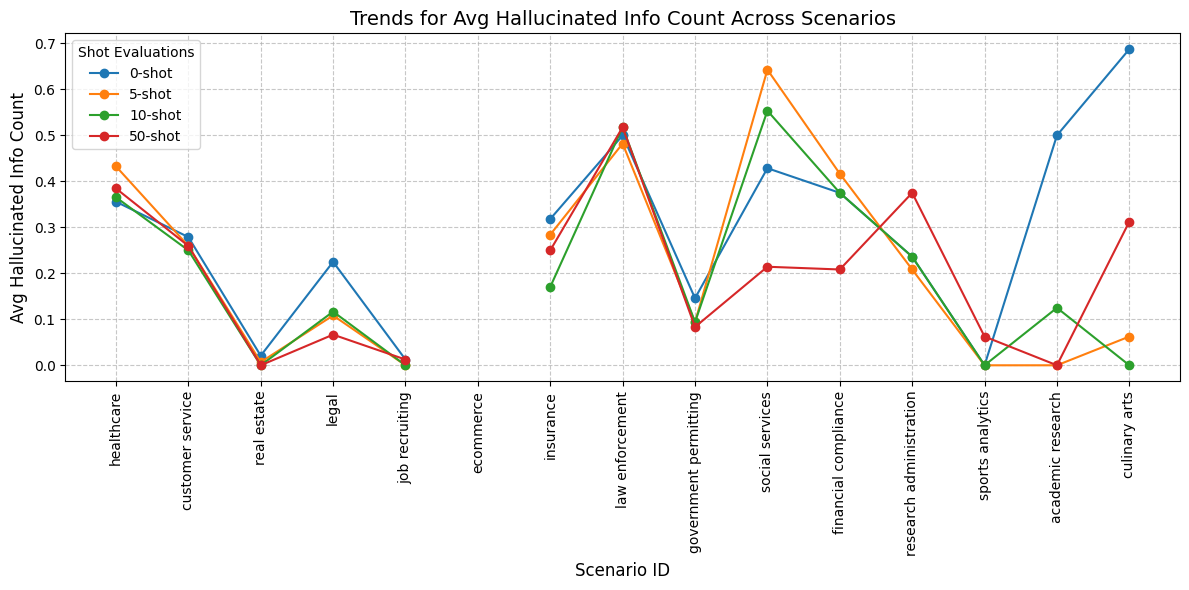

In [67]:
scenario_metrics = {"0-shot":zero_shot_summary_json['scenario_metrics'],
                    "5-shot":five_shot_summary_json['scenario_metrics'], 
                    "10-shot":ten_shot_summary_json['scenario_metrics'], 
                    "50-shot":fifty_shot_summary_json['scenario_metrics']}


# List of metrics to compare
metrics_to_compare = ["avg_extraction_quality", "avg_correct_fact_inclusion_rate","avg_hallucinated_info_count"]
shot_evaluations = ["0-shot", "5-shot", "10-shot", "50-shot"]

# Generate plots for each metric
for metric in metrics_to_compare:
    # Prepare data for the current metric
    scenario_dom = [entry["scenario_domain"] for entry in scenario_metrics["0-shot"]]
    data = {
        shot: [entry[metric] for entry in scenario_metrics[shot]]
        for shot in shot_evaluations
    }

    # Convert data to DataFrame for plotting
    df = pd.DataFrame(data, index=scenario_dom)

    # Plot the current metric
    plt.figure(figsize=(12, 6))
    for shot in shot_evaluations:
        plt.plot(df.index, df[shot], marker='o', label=shot)

    # Formatting
    plt.title(f"Trends for {metric.replace('_', ' ').title()} Across Scenarios", fontsize=14)
    plt.xlabel("Scenario ID", fontsize=12)
    plt.ylabel(metric.replace('_', ' ').title(), fontsize=12)
    plt.xticks(df.index, [f"{i}" for i in df.index], rotation=90)
    plt.legend(title="Shot Evaluations")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()


#### Note: Ecomerce is empty as the num_outputs_in_grouping is zero